# Importing required libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

# Load the data into a pandas DataFrame


In [111]:
data_types = {'index': int, 'Order_ID': str, 'Date': str, 'Status': str, 'Fulfilment': str, 'Sales_Channel': str,
'ship-service-level': str, 'Style': str, 'SKU': str, 'Category': str, 'Size': str, 'ASIN': str,
'Courier Status': str, 'Qty': float, 'currency': str, 'Amount': float, 'ship-city': str,
'ship-state': str, 'ship-postal-code': str, 'ship-country': str, 'promotion-ids': str,
'B2B': bool, 'fulfilled_by': str} # Define the data types

data = pd.read_csv("D:\sem-4\predictive analysis\Excel files\Amazon Sale Report.csv", dtype=data_types, low_memory=False)

# Details of the dataset


In [112]:
data.head()

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled_by,Column1
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,NaN,False,NaN,NaN


In [113]:
print(data.shape)

(128975, 24)


In [114]:
print(data.describe())


               index            Qty         Amount
count  128975.000000  128975.000000  121180.000000
mean    64487.000000       0.904431     648.561465
std     37232.019822       0.313354     281.211687
min         0.000000       0.000000       0.000000
25%     32243.500000       1.000000     449.000000
50%     64487.000000       1.000000     605.000000
75%     96730.500000       1.000000     788.000000
max    128974.000000      15.000000    5584.000000


In [115]:
print(data.info)

<bound method DataFrame.info of          index             Order_ID       Date                        Status  \
0            0  405-8078784-5731545  4/30/2022                     Cancelled   
1            1  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  4/30/2022                       Shipped   
3            3  403-9615377-8133951  4/30/2022                     Cancelled   
4            4  407-1069790-7240320  4/30/2022                       Shipped   
...        ...                  ...        ...                           ...   
128970  128970  406-6001380-7673107  5/31/2022                       Shipped   
128971  128971  402-9551604-7544318  5/31/2022                       Shipped   
128972  128972  407-9547469-3152358  5/31/2022                       Shipped   
128973  128973  402-6184140-0545956  5/31/2022                       Shipped   
128974  128974  408-7436540-8728312  5/31/2022                       Shipped   

       

In [116]:
correlation = data[['Qty', 'Amount']].corr()

correlation

,Qty,Amount
Qty,1.0000,0.0669
Amount,0.0669,1.0000


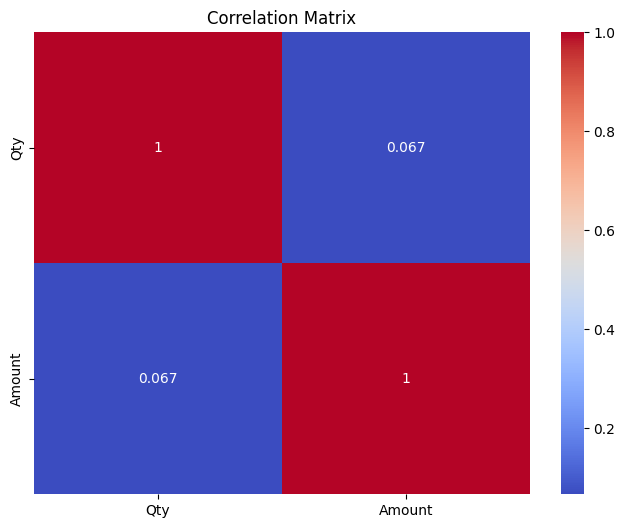

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [118]:
print(data.dtypes)

index                   int32
Order_ID               object
Date                   object
Status                 object
Fulfilment             object
Sales_Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                   float64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled_by           object
Column1                object
dtype: object


In [119]:
print(data.columns)

Index(['index', 'Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled_by', 'Column1'],
      dtype='object')


# Finding and handling missing values

In [120]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
imputer_mean = SimpleImputer(strategy='mean')
data[['Qty', 'Amount']] = imputer_mean.fit_transform(data[['Qty', 'Amount']])
data['fulfilled_by'].fillna('Unknown', inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

Missing Values:
index                     0
Order_ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales_Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled_by          89698
Column1               49050
dtype: int64


# Time Series Analysis


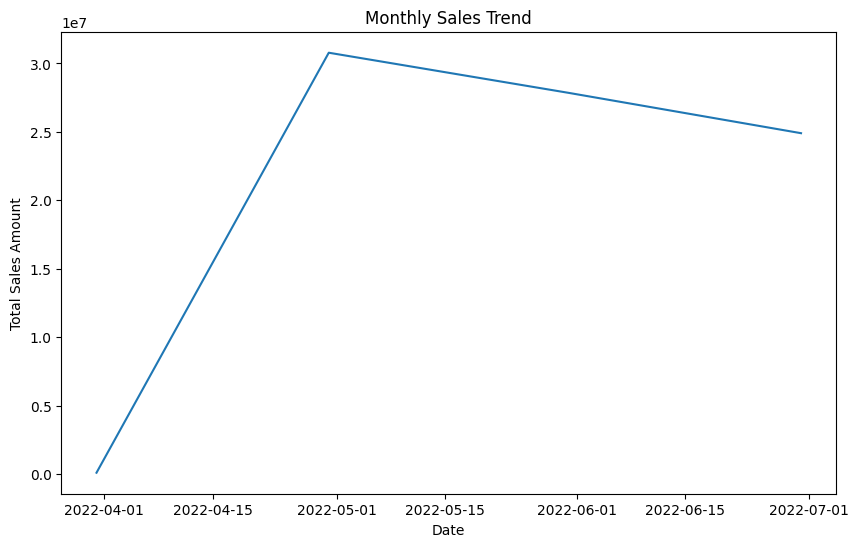

In [121]:
data.set_index('Date', inplace=True)
monthly_sales = data['Amount'].resample('M').sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trend')
plt.show()

sales_scalar = monthly_sales.values

# Forecasting the sales trend


E:\python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


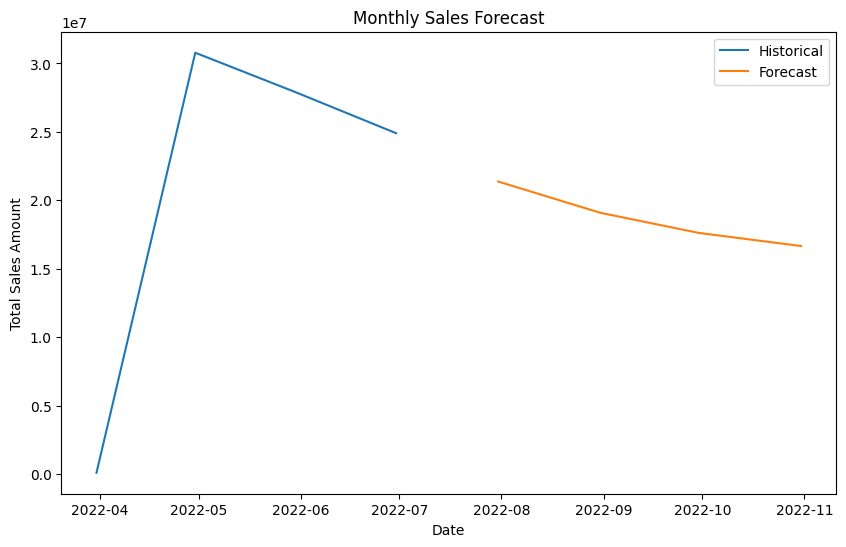

In [122]:
model = ARIMA(sales_scalar, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 4 months' sales
forecast_values = model_fit.forecast(steps=4)

# Create the date range for the forecasted months
last_month = monthly_sales.index[-1]
forecast_dates = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=4, freq='M')

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Sales': forecast_values})

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label='Historical')
sns.lineplot(x=forecast_df['Date'], y=forecast_df['Sales'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()

# Standardizing the data


In [123]:
columns_to_standardize = ['Qty', 'Amount','ship-postal-code']

data_selected = data[columns_to_standardize]

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

data_standardized = pd.DataFrame(data_standardized, columns=columns_to_standardize)

print(data_standardized.head())

        Qty    Amount  ship-postal-code
0 -2.886307 -0.003454         -0.333646
1  0.304989 -0.889872          0.501989
2  0.304989 -1.172358         -0.280747
3 -2.886307  0.384359          0.736603
4  0.304989 -0.273540          0.710829


# Silhouette Analysis with different numbers of clusters



Silhouette Score (3 clusters): 0.5920
Silhouette Score (4 clusters): 0.5301
Silhouette Score (5 clusters): 0.5707


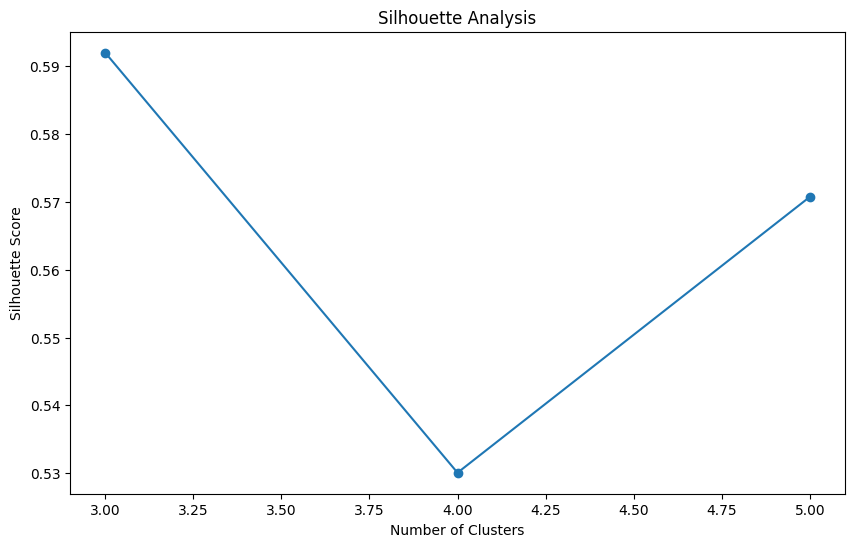

In [124]:
cluster_data = data[['Qty', 'Amount']]
silhouette_scores = []

for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(cluster_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_data, labels)
    silhouette_scores.append(silhouette_avg)
    print("Silhouette Score ({} clusters): {:.4f}".format(k, silhouette_avg))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(3, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Clustering with optimal number of clusters (3 clusters)


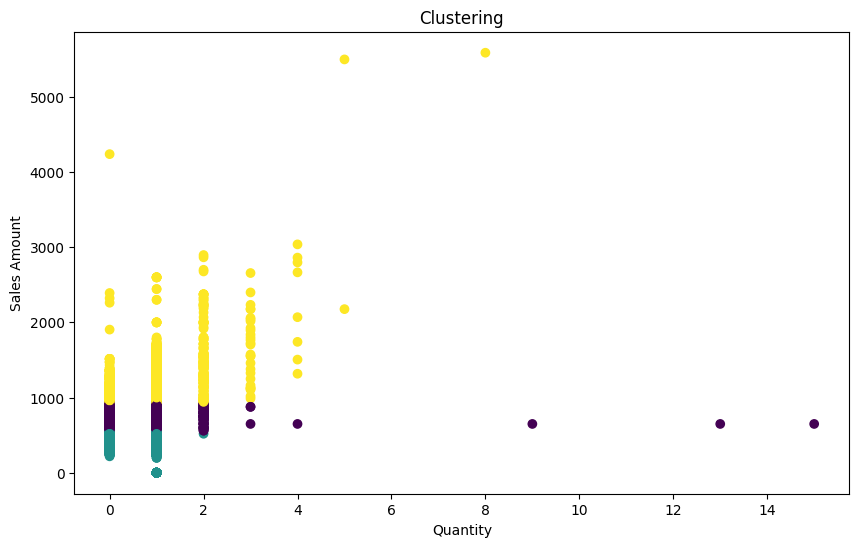

In [125]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(cluster_data)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data['Qty'], data['Amount'], c=data['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Sales Amount')
plt.title('Clustering')
plt.show()

# Print mean quantity and sales amount for each cluster


In [126]:
cluster_mean = data.groupby('Cluster')[['Qty', 'Amount']].mean()
print(cluster_mean)


              Qty       Amount
Cluster                       
0        0.835712   707.210751
1        0.956293   407.844199
2        0.982652  1158.355516


# Product Segmentation


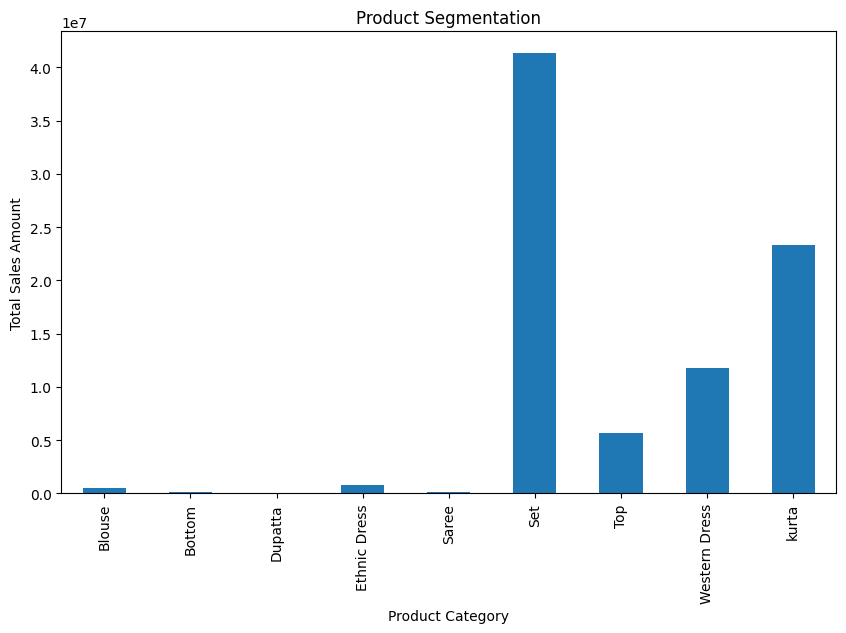

In [127]:
product_sales = data.groupby('Category')['Amount'].sum()

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Product Segmentation')
plt.show()

# Geographic Analysis

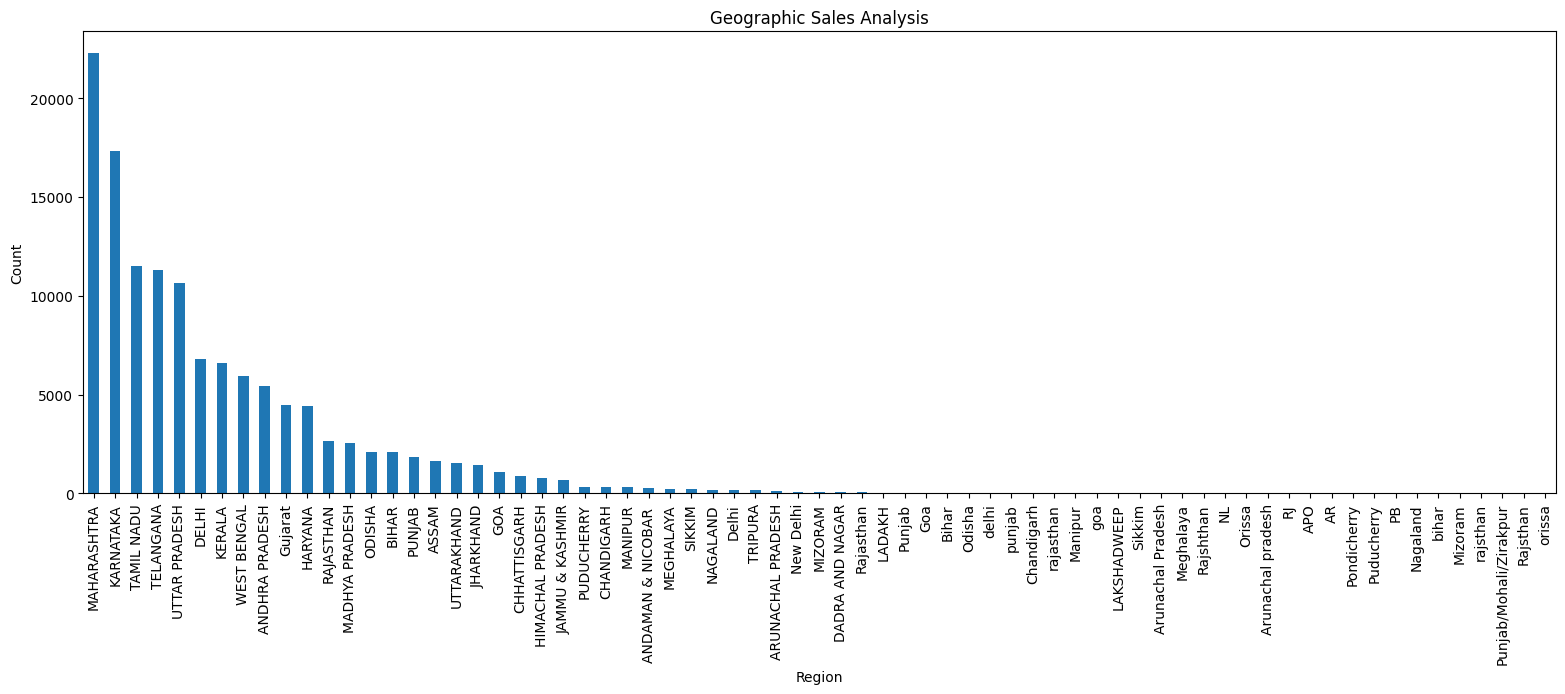

In [128]:
region_sales = data['ship-state'].value_counts()

plt.figure(figsize=(19, 6))
region_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Geographic Sales Analysis')
plt.show()